In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from numpy import sqrt, arange
from scipy import stats

# Use Portuguese Alcohol Consumption Study for analysis

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
student = pd.read_csv("C:\\Users\\jaime\\Jupyter Notebooks\\Panda Data Analyst\\data\\student\
\student.csv",sep=";")

In [6]:
student.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [32]:
# Need to create a few variables from the raw data
student.rename(columns={'sex':'gender'}, inplace=True)
student['alcohol_index'] = (5*student['Dalc'] + 2*student['Walc'])/7 #intermediate variable of the weighted average of how
#much is drunk during the week and how much is drunk during the weekend
# Alcohol consumption level
student['acl'] = student['alcohol_index'] <= 2
student['acl'] = student['acl'].map({True: 'Low', False: 'High'}) #low index is anyone who drinks less than 2 a week

# Confidence Intervals - calculate CI for means and for proportions

In [8]:
sample_size = student.shape[0]
print(sample_size)

649


In [24]:
#We are interested in the mean 
sample_mean_grade = student['G3'].mean()
sample_mean_grade

11.906009244992296

In [11]:
round(sample_mean_grade,2)

11.91

In [25]:
#calculate the standard mean error for the grades
std_error_grades = student['G3'].std()/sqrt(sample_size)
std_error_grades

0.126814350307949

In [26]:
stats.norm.interval(0.95, loc=sample_mean_grade, scale=std_error_grades) #using norm object from stats package to calculate the CI

(11.65745768566587, 12.154560804318722)

In [33]:
student['acl'].value_counts(normalize=True) # we want to calculate CI for a proportion

Low     0.744222
High    0.255778
Name: acl, dtype: float64

In [34]:
high_prop = student['acl'].value_counts(normalize=True)['High']
std_error_prop = sqrt(high_prop*(1-high_prop)/sample_size)

In [35]:
stats.norm.interval(0.98, loc=high_prop, scale=std_error_prop) # This tells us that 0.25 seems like a good guess for
#the proportion of students with High Alcohol Consumption Levels in the the Population

(0.21593666225148048, 0.2956195781183193)

# Probability calculations

In [36]:
#Assuming that P(High ALC) = 0.25, in a class of 10 what is the probability of finding 5 students with high ACL?
stats.binom.pmf(k=5,n=10,p=0.25)

0.058399200439453194

In [37]:
def plot_probs_n(n):
    fig, ax = plt.subplots(1,2, figsize= (14,4))
    ax[0].bar(left=arange(n+1), height=stats.binom.pmf(k=arange(n+1), n=n, p=0.25))
    ax[0].set_xticks(arange(n+1))
    ax[0].set_title('Probability mass function')
    ax[1].plot(stats.binom.cdf(k=range(n+1), n=n, p=0.25))
    ax[1].set_xticks(arange(n+1))
    ax[1].set_title('Cumulative distribution function')

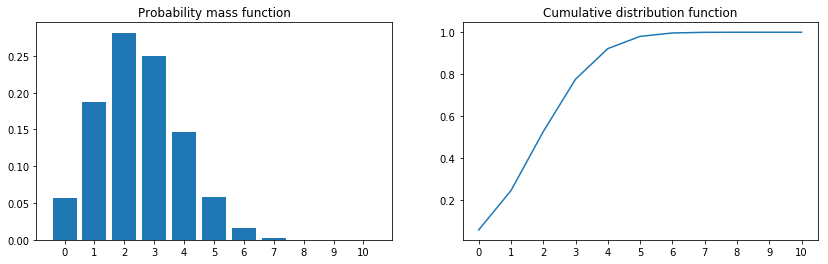

In [41]:
plot_probs_n(10)

# Null Hypothesis Testing framework
1. Setting up two competing hypotheses
2. Set in advanced some level of significance, called alpha. Usually 0.05
3. Calculate a test statistic and the p-value (or find rejection region)
4. Make a test decision about the null hypothesis
5. State an overall conclusion

# Are the population variances equal in the two groups of students (Low vs. High alcohol consumption)?

In [43]:
# perform the Bartetts's test whose Null Hypothesis is that the variances are equal. We will use a significance level of 5.0%
student.groupby('acl')['G3'].var()

acl
High    11.151406
Low      9.765917
Name: G3, dtype: float64

In [44]:
grades_low_acl = student['G3'][student['acl']=='Low']
grades_high_acl = student['G3'][student['acl']=='High']
stats.bartlett(grades_low_acl, grades_high_acl)

BartlettResult(statistic=1.1025085913378183, pvalue=0.29371623181175127)

What does this mean for us? According to the test, we cannot reject the Null Hypothesis of equal variances.
Assume that the two groups are samples from a population with the same variances.

# Does alcohol consumption affect academic performance?


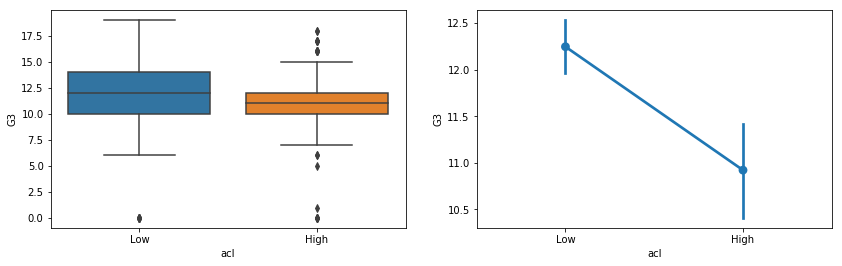

In [47]:
#Let's compare the two means from each group.

fig, axes = plt.subplots(1,2, figsize = (14,4))
sns.boxplot(x='acl', y='G3', data=student, ax=axes[0])
sns.pointplot(x='acl', y='G3', data=student, ax=axes[1]);

# There seems to be a difference in the means between the two groups. Are they statistically different?
Null Hypothesis: for both groups (High and Low ACL) the population means of the final grade are equal.

Alternative Hypothesis: The population means of the final grades are different.

In [48]:
#Let's apply a t-test
stats.ttest_ind(grades_low_acl, grades_high_acl, equal_var=True)

Ttest_indResult(statistic=4.621320706949354, pvalue=4.603608830369269e-06)

#the resulting p value suggests that there is a significant difference between the two groups, reject the Null hypothesis of equal means

# Conclusion:there is a statistical significant difference between the grades in the two analyzed groups, since the mean for the group with high alcohol consumption is less than the mean of the other group, the results suggest that alcohol consumption has a negative impact on students' academic performance.

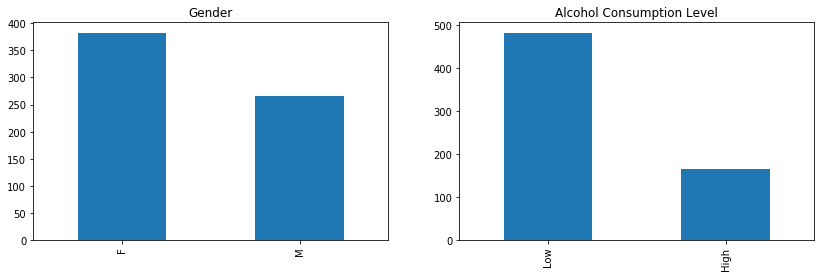

In [50]:
# Do male teenagers drink more than female teenagers?
fig, axes = plt.subplots(1,2, figsize = (14,4))
student['gender'].value_counts().plot(kind='bar', ax=axes[0], title='Gender')
student['acl'].value_counts().plot(kind='bar', ax=axes[1], title='Alcohol Consumption Level');

In [51]:
# plot to show the differences among genders
gender_acl_table = pd.crosstab(student['acl'], student['gender'])
gender_acl_table

gender,F,M
acl,,
High,62,104
Low,321,162


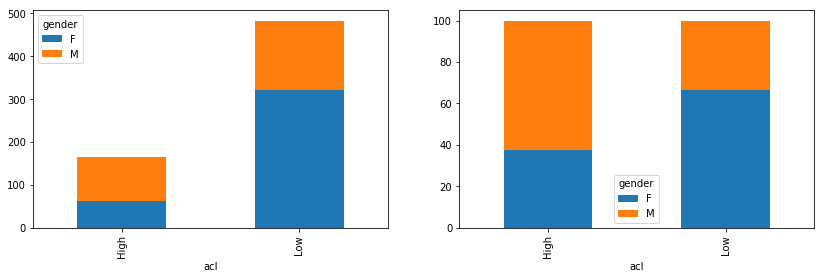

In [52]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
gender_acl_table.plot(kind='bar', stacked=True, ax=axes[0]);
(100*(gender_acl_table.T/gender_acl_table.apply(sum, axis=1)).T).plot(kind='bar', stacked=True, ax=axes[1]);

#are the variables independent? Use a Chi-square test in a contingency table

#This function computes the chi-square statistic and p-value for the hypothesis test of independence of the observed frequencies in the contingency table

In [54]:
chi_stat, p_value, dof, expected = stats.chi2_contingency(gender_acl_table)

In [55]:
p_value

8.72933011769437e-11

In [58]:
expected_table = pd.DataFrame(expected, index=['High','Low'], columns=['F','M'])
expected_table

,F,M
High,97.96302,68.03698
Low,285.03698,197.96302


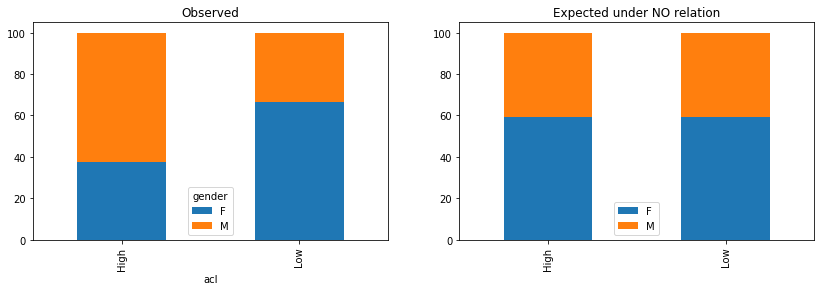

In [59]:
fig, axes = plt.subplots(1,2, figsize = (14,4))
(100*(gender_acl_table.T/gender_acl_table.apply(sum, axis=1)).T)\
.plot(kind='bar', stacked=True, title='Observed', ax=axes[0]);

(100*(expected_table.T/expected_table.apply(sum, axis=1)).T)\
.plot(kind='bar', stacked=True, title='Expected under NO relation', ax=axes[1]);

In [ ]:
Conclusion: Males drink more than females 